In [310]:
!pip install psycopg2-binary

In [311]:
import psycopg2
# Replace with your actual PostgreSQL credentials
conn = psycopg2.connect(
dbname='salaries',
user='postgres',
password='lmvr', # Change this!
host='localhost',
port='5432'
)
cur = conn.cursor()
print("✅ Connected to the database!")

✅ Connected to the database!


In [312]:
cur.execute("""
CREATE TABLE IF NOT EXISTS salaries (
work_year INTEGER,
experience_level TEXT,
employment_type TEXT,
job_title TEXT,
salary INTEGER,
salary_currency TEXT,
salary_in_usd INTEGER,
employee_residence TEXT,
remote_ratio INTEGER,
company_location TEXT,
company_size TEXT
);
""")
conn.commit()
print("✅ Table created!")

✅ Table created!


In [313]:
import csv
with open('salaries.csv', 'r') as s: 
    next(s) # Skip header
    reader = csv.reader(s)
    for row in reader:
        cur.execute("""
        INSERT INTO salaries (work_year, experience_level, employment_type, job_title, salary, salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size)
        VALUES (%s, %s, %s,%s, %s, %s,%s, %s, %s,%s, %s)
        ;
        """, row)
conn.commit()
print("✅ CSV data imported!")

✅ CSV data imported!


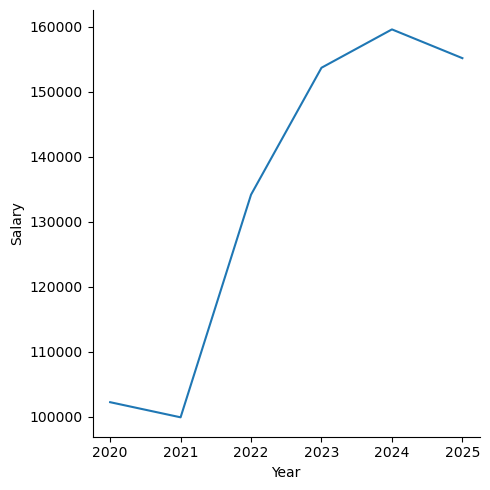

In [200]:
#QUESTION 6 Yearly Salary Trends
a={}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cur.execute("SELECT work_year, AVG (salary_in_usd) AS salary FROM salaries GROUP BY work_year ORDER BY work_year ASC")
rows = cur.fetchall()
df=pd.DataFrame(rows)
df.columns = ['Year', 'Salary']
sns.relplot (x= 'Year' , y='Salary', data= df, kind= 'line')
plt.show()

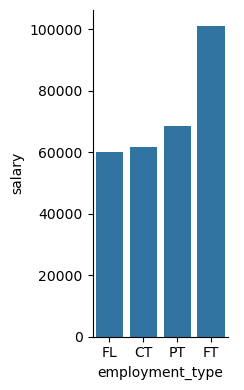

In [204]:
#EMPLOYMENT TYPE AND THE AVERANGE SALARY OF ENTRANCE LEVEL 


a={}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cur.execute("SELECT employment_type, AVG (salary_in_usd) AS salary FROM salaries WHERE experience_level = 'EN' GROUP BY employment_type ORDER BY salary")
rows = cur.fetchall()
df=pd.DataFrame(rows)
df.columns = ['employment_type', 'salary']
sns.catplot (x= 'employment_type' , y='salary', data= df, kind = "bar",  height=4, aspect=.6)
plt.show()

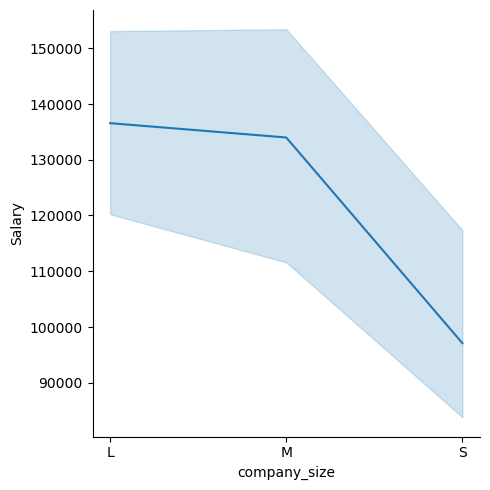

In [224]:
# QUESTION 7 Company Growth & Hiring Trends 
a={}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cur.execute("SELECT work_year AS year,company_size, AVG (salary_in_usd) AS salary FROM salaries GROUP BY company_size, year ORDER BY year DESC")
rows = cur.fetchall()
df=pd.DataFrame(rows)
df.columns = ['Year','company_size', 'Salary' ]
sns.relplot (x= 'company_size' , y='Salary', data= df, kind= 'line')
plt.show()

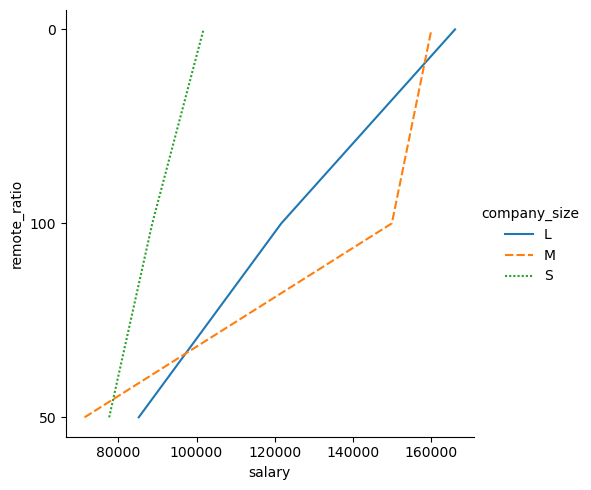

In [236]:
# QUESTION 7 Company size, remote eadio and salary
a={}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cur.execute("SELECT company_size, remote_ratio, AVG (salary_in_usd) AS salary FROM salaries GROUP BY company_size, remote_ratio ORDER BY remote_ratio ASC")
rows = cur.fetchall()
df=pd.DataFrame(rows)
df.columns = ['company_size','remote_ratio', 'salary' ]
sns.relplot (x= 'salary' , y='remote_ratio', data= df, kind= 'line', style= "company_size", hue= "company_size")

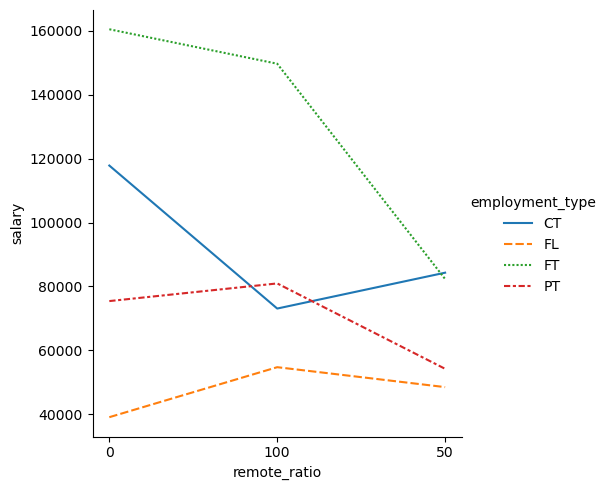

In [254]:
# QUESTION 7 remote ratio, employment type and salary
a={}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cur.execute("SELECT employment_type, remote_ratio, AVG (salary_in_usd) AS salary FROM salaries GROUP BY employment_type, remote_ratio ORDER BY remote_ratio")
rows = cur.fetchall()
df=pd.DataFrame(rows)
df.columns = ['employment_type','remote_ratio', 'salary' ]
sns.relplot (x= 'remote_ratio' , y='salary', data= df, kind= 'line', style= "employment_type", hue= "employment_type")

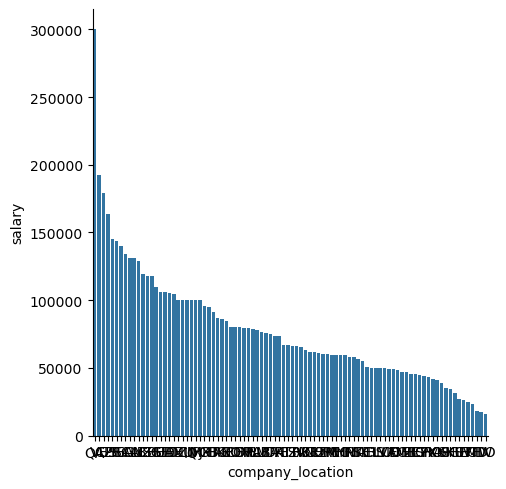

In [268]:
# QUESTION 8 Impact of Region on Salaries
a={}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cur.execute("SELECT company_location, AVG (salary_in_usd)AS salary FROM salaries GROUP BY company_location ORDER BY salary DESC")
rows = cur.fetchall()
df=pd.DataFrame(rows)
df.columns = ['company_location','salary']
sns.catplot (x= 'company_location' , y='salary', data= df, kind= 'bar')

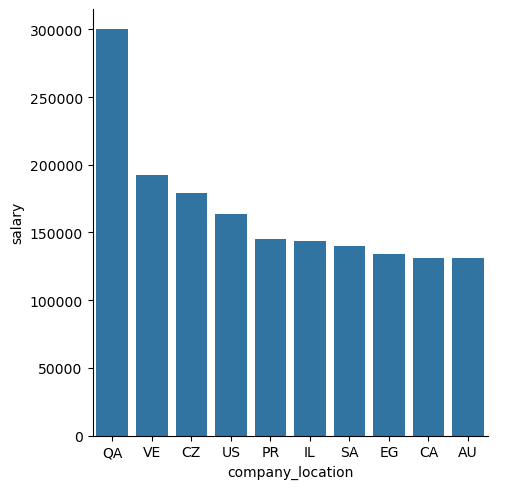

In [270]:
# QUESTION 8 Impact of Region on Salaries LIMIT 10
a={}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cur.execute("SELECT company_location, AVG (salary_in_usd)AS salary FROM salaries GROUP BY company_location ORDER BY salary DESC Limit 10")
rows = cur.fetchall()
df=pd.DataFrame(rows)
df.columns = ['company_location','salary']
sns.catplot (x= 'company_location' , y='salary', data= df, kind= 'bar')

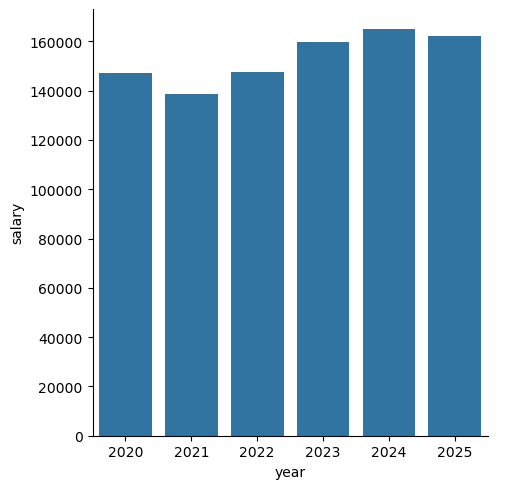

In [294]:
# QUESTION 8 Impact of QA on Salaries about the time
a={}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cur.execute("SELECT  work_year AS year, AVG (salary_in_usd)AS salary FROM salaries  WHERE company_location = 'US'  GROUP BY year ORDER BY year DESC  Limit 10")
rows = cur.fetchall()
df=pd.DataFrame(rows)
df.columns = ['year','salary']
sns.catplot (x= 'year' , y='salary', data= df, kind= 'bar')

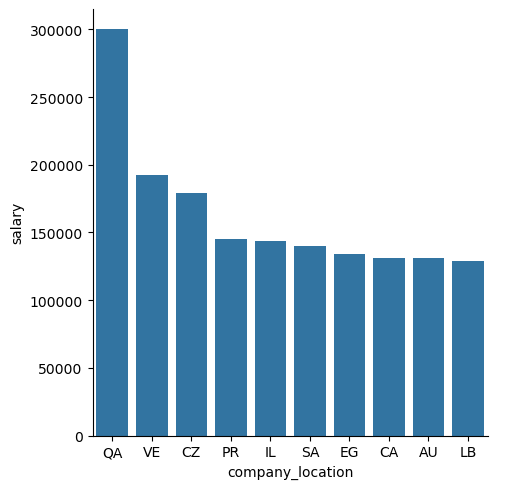

In [296]:
# QUESTION 9 Best Alternative to the US for Jobs LIMIT 10
a={}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cur.execute("SELECT company_location, AVG(salary_in_usd) AS salary FROM salaries WHERE company_location != 'US' GROUP BY company_location ORDER BY salary DESC LIMIT 10")
rows = cur.fetchall()
df=pd.DataFrame(rows)
df.columns = ['company_location','salary']
sns.catplot (x= 'company_location' , y='salary', data= df, kind= 'bar')

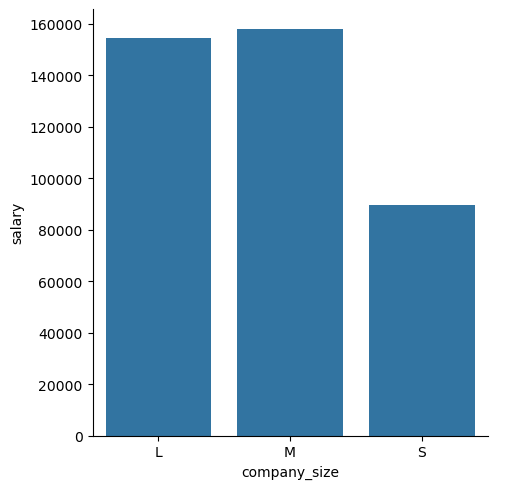

In [320]:
#QUESTION 10 Company Size vs. Salary
a={}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cur.execute("SELECT company_size, AVG (salary_in_usd) AS salary FROM salaries GROUP BY company_size ORDER BY company_size ASC")
rows = cur.fetchall()
df=pd.DataFrame(rows)
df.columns = ['company_size','salary']
sns.catplot (x= 'company_size' , y='salary', data= df, kind= 'bar')

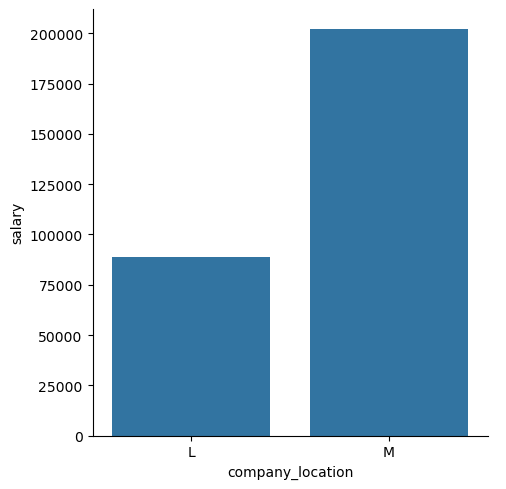

In [326]:
#QUESTION 10 Company Size vs. Salary
a={}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cur.execute("SELECT company_size, AVG(salary_in_usd) AS salary FROM salaries WHERE company_location = 'CZ' GROUP BY company_size ORDER BY company_size ASC")
rows = cur.fetchall()
df=pd.DataFrame(rows)
df.columns = ['company_location','salary']
sns.catplot (x= 'company_location' , y='salary', data= df, kind= 'bar')